In [1]:
import pandas as pd                                                 #Library to deal with data frame
import numpy as np                                                  #Library to deal with arrays
import matplotlib.pyplot as plt                                     #Library to deal with graphs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error                      #Library to calculate mean square error
from math import sqrt                                               #Math library to calculate square
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})     #constant customization for all the graphs
pd.options.mode.chained_assignment = None 

In [2]:
#data cleaning

In [3]:
dataset=pd.read_excel('DataSet1.xlsx')

In [4]:
dataset.head()

,"""Date"",""Temp"""
0,"""1981-01-01"",20.7"
1,"""1981-01-02"",17.9"
2,"""1981-01-03"",18.8"
3,"""1981-01-04"",14.6"
4,"""1981-01-05"",15.8"


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   "Date","Temp"  3650 non-null   object
dtypes: object(1)
memory usage: 28.6+ KB


In [6]:
new = dataset['"Date","Temp"'].str.split(",", n = 1, expand = True)

In [7]:
dataset['Date']=new[0]
dataset['Temp']=new[1]

In [8]:
dataset['Temp'].iloc[1859]

'11.6'

In [9]:
dataset['Date'].iloc[1859]

'"1986-02-04"'

In [10]:
temp=dataset['Temp'].iloc[1859]
dat=dataset['Date'].iloc[1859]

In [11]:
print(temp)

11.6


In [12]:
dataset['Temp'].iloc[1859]=temp
dataset['Date'].iloc[1859]=dat

In [13]:
dataset.loc[1859]

"Date","Temp"    "1986-02-04",11.6
Date                  "1986-02-04"
Temp                          11.6
Name: 1859, dtype: object

In [14]:
dataset['Date']=dataset['Date'].str.replace('\"','')

In [15]:
dataset.head()

,"""Date"",""Temp""",Date,Temp
0,"""1981-01-01"",20.7",1981-01-01,20.7
1,"""1981-01-02"",17.9",1981-01-02,17.9
2,"""1981-01-03"",18.8",1981-01-03,18.8
3,"""1981-01-04"",14.6",1981-01-04,14.6
4,"""1981-01-05"",15.8",1981-01-05,15.8


In [16]:
dataset['Temp']=pd.to_numeric(dataset['Temp'])
dataset['Date']=pd.to_datetime(dataset['Date'],format='%Y-%m-%d')


In [17]:
dataset.drop(['"Date","Temp"'], axis=1,inplace=True)

In [18]:
dataset.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [20]:
dataset.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [21]:
#convert Xlsx to Csv file

In [22]:
dataset.to_csv('Cleaned_dataset1.csv', encoding='utf-8')

In [23]:
# Import data
df = pd.read_csv('Dataset1_Cleaned.csv', names=['value'], header=0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3647 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   3647 non-null   float64
dtypes: float64(1)
memory usage: 57.0+ KB


In [25]:
df.head()

,value
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [26]:
df[2500:3649].shape

(1147, 1)

In [27]:
#SES_MODEl
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(df)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2500,3649)

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [28]:
yhat

2500    13.251537
2501    12.310338
2502    11.343416
2503    11.368169
2504    12.082021
          ...    
3645    13.577646
3646    14.506079
3647    13.847238
3648    13.847238
3649    13.847238
Length: 1150, dtype: float64

In [34]:
len(df[2500:3649])

1147

In [33]:
len(yhat)

1150

In [35]:
mae=mean_squared_error(yhat,df[2497:3649].value)
print(sqrt(mae))

2.16876874275847


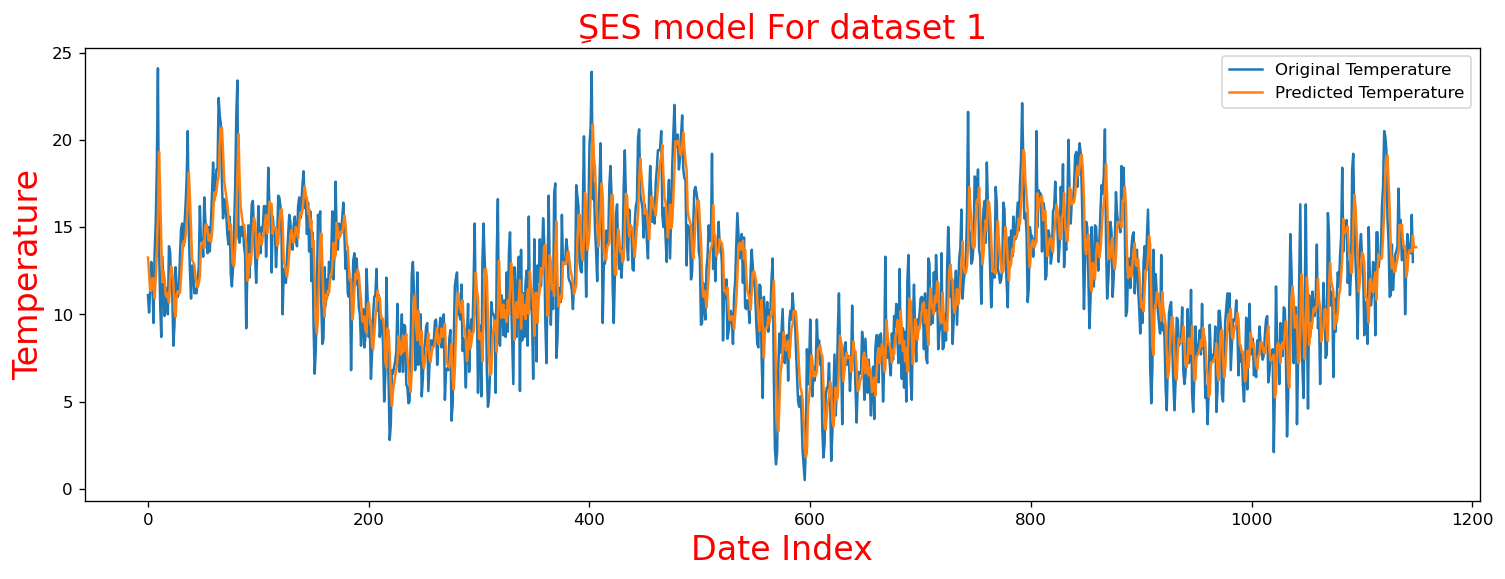

In [37]:
#plotting the graph
plt.figure(figsize=(15,5))

plt.plot(df[2500:3649].values,label='Original Temperature')
plt.plot(yhat.values,label='Predicted Temperature')
plt.xlabel("Date Index" ,fontsize=20,color='red')
plt.ylabel("Temperature",fontsize=20,color='red')
plt.title("ِSES model For dataset 1",fontsize=20,color='red')
plt.legend()